# Agriculture Case Study

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

# Problem Statement

We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the excel files
train_df = pd.read_excel('train_agriculture.xlsx')
test_df = pd.read_excel('test_agriculture.xlsx')

In [4]:
print(train_df.shape)
print(test_df.shape)

(4599, 10)
(1199, 9)


In [6]:
train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [7]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [8]:
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [11]:
train_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [12]:
test_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

Both the test and train df are having the same data types as expected. So we need not to change the data types.

In [14]:
#Checking null values
train_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [15]:
test_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

Number of weeks used column in both train and test data set have null values.

In [16]:
# Imputing the null values
print(train_df['Number_Weeks_Used'].mean())
print(test_df['Number_Weeks_Used'].mean())

28.89102718306471
29.033333333333335


The means of the train data and test data is slightly different

Lets check the overall mean combining both train and test data

In [21]:
total_instances=len(train_df['Season'])+len(test_df['Season'])-119-442
sum_WeeksUsed=train_df['Number_Weeks_Used'].sum()+test_df['Number_Weeks_Used'].sum()
total_Mean=sum_WeeksUsed/total_instances
print(total_instances, sum_WeeksUsed,total_Mean)

5237 151456.0 28.92037426007256


In [19]:
print(train_df['Number_Weeks_Used'].median())
print(test_df['Number_Weeks_Used'].median())

28.0
28.0


There is not much difference in mean and median. I am going to replace the null values with the mean of the combined set.

In [22]:
train_df['Number_Weeks_Used'].fillna(28.92037426007256,inplace=True)
test_df['Number_Weeks_Used'].fillna(28.92037426007256,inplace=True)

In [23]:
train_df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

0 indicates not damaged and 1, 2 as damaged due to separate reasons.

We can mark 1 and 2 as 1. Since, both represents as damaged crops.

In [24]:
train_df['Crop_Damage'].replace(to_replace=2,value=1,inplace=True)

In [25]:
train_df['Crop_Damage'].value_counts()

0    3820
1     779
Name: Crop_Damage, dtype: int64

In [26]:
train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.893848,9.205479,1.894325,0.169385
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965788,9.713253,0.694952,0.375132
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.920374,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,1.000000


In [27]:
train_df['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

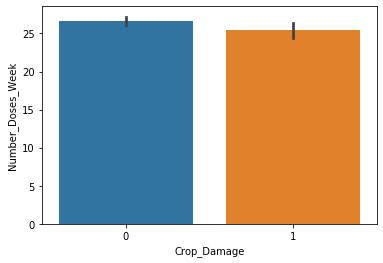

In [28]:
# Bar plots
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=train_df)

No much difference in the number doses week found for the crop damage.

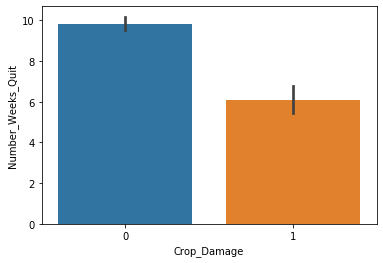

In [29]:
# Bar plots
sns.barplot(x='Crop_Damage',y='Number_Weeks_Quit',data=train_df)

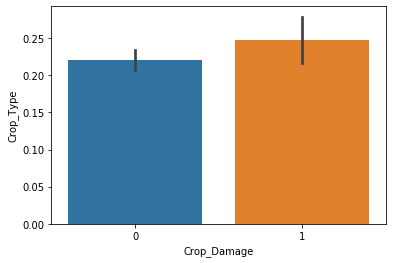

In [30]:
sns.barplot(x='Crop_Damage',y='Crop_Type',data=train_df)

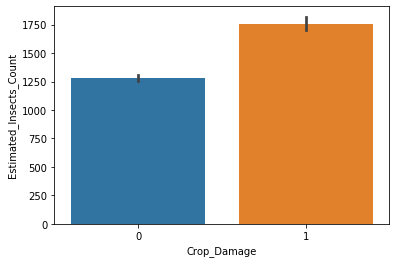

In [31]:
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',data=train_df)

If the insect count is greater than 1250 then there are high chances for the crop to get damaged.

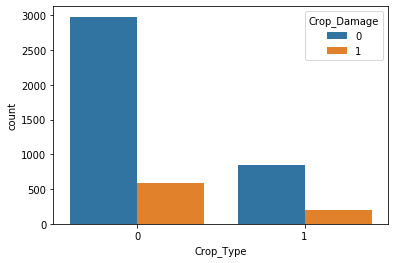

In [32]:
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=train_df)

In case of crop type 0, the damage is very less, similar is in the case of crop type 1. 

Till now major factor is estimated insects, going to be helpful for predictions.

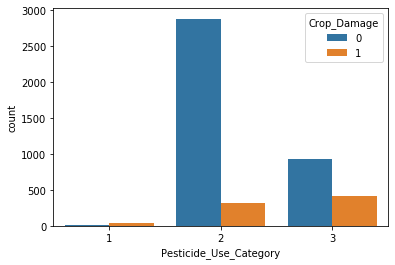

In [33]:
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=train_df)

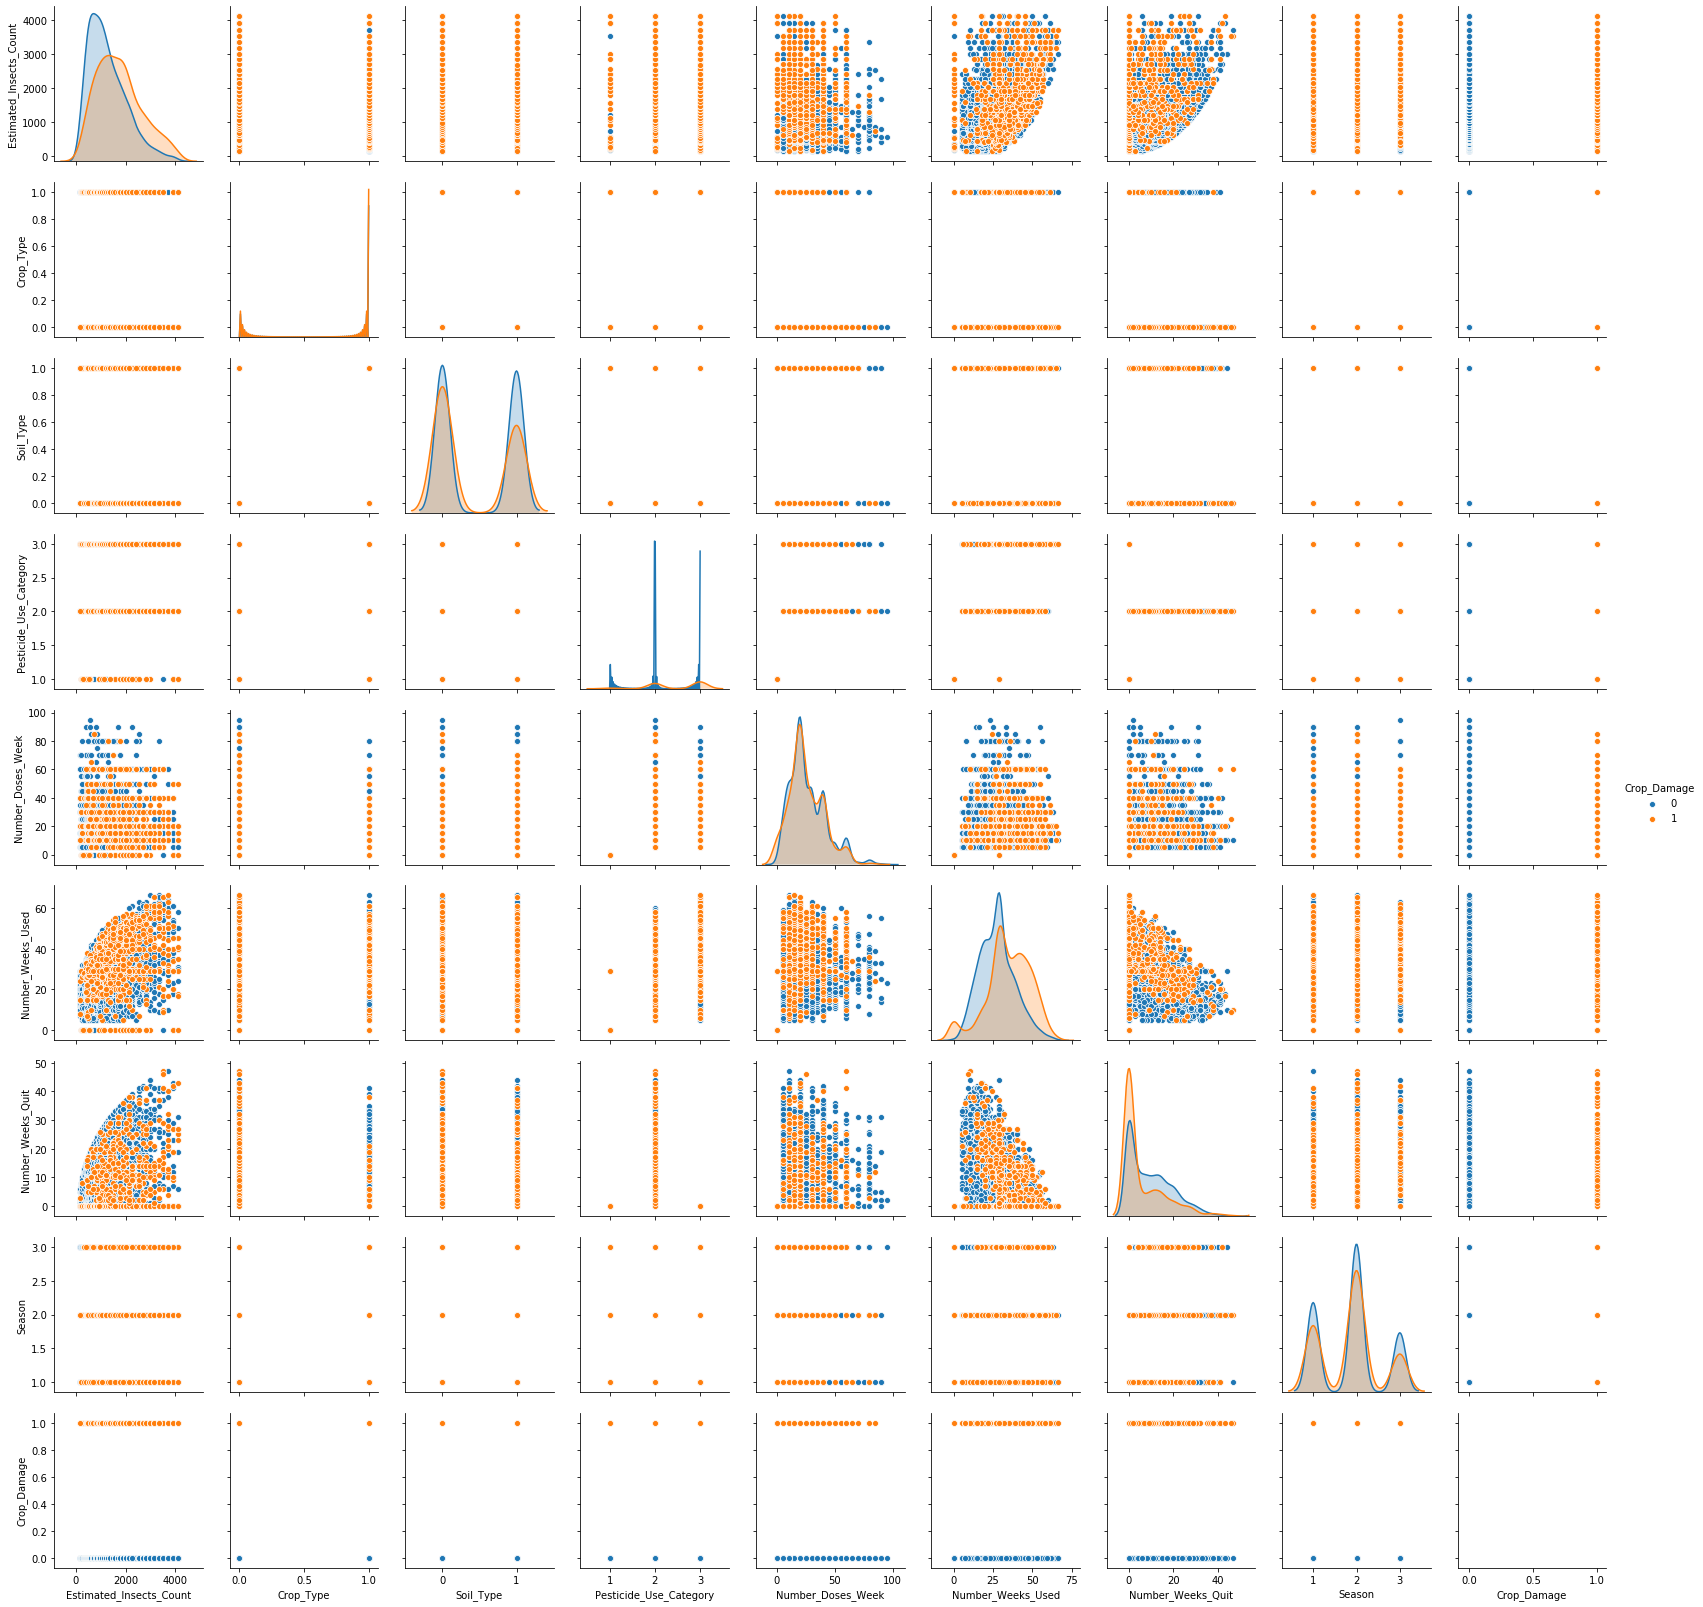

In [34]:
# Pair plot
sns.pairplot(train_df,hue='Crop_Damage')

# Bivariate Analysis

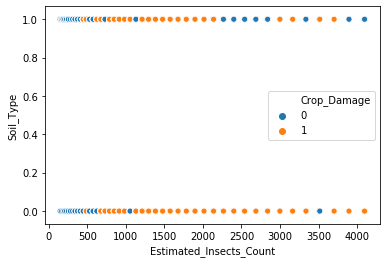

In [35]:
sns.scatterplot(x='Estimated_Insects_Count',y='Soil_Type',hue='Crop_Damage',data=train_df)

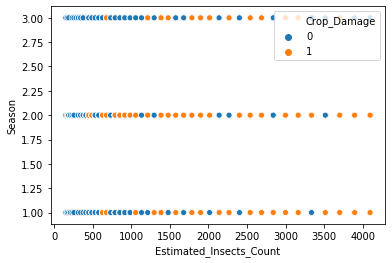

In [36]:
sns.scatterplot(x='Estimated_Insects_Count',y='Season',hue='Crop_Damage',data=train_df)

## Feature Selection

(9.0, 0.0)

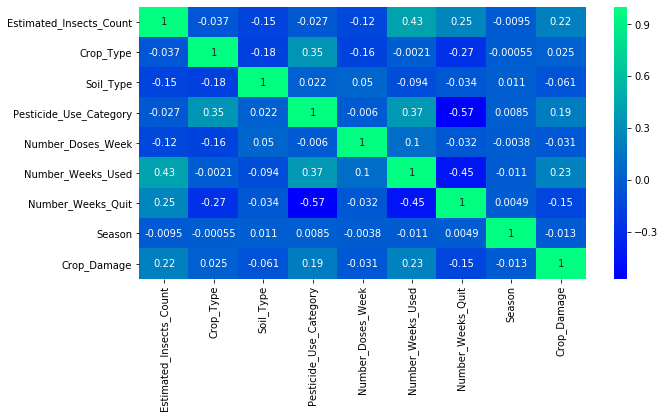

In [39]:
# Plot heat map
plt.figure(figsize=(10,5))
corr_mat=train_df.corr()
ax = sns.heatmap(corr_mat,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [40]:
# We can drop ID column, as it won't be helpful in case of training our model
train_df.drop('ID',axis=1,inplace=True)
test_df.drop('ID',axis=1,inplace=True)

### Outlier Analysis

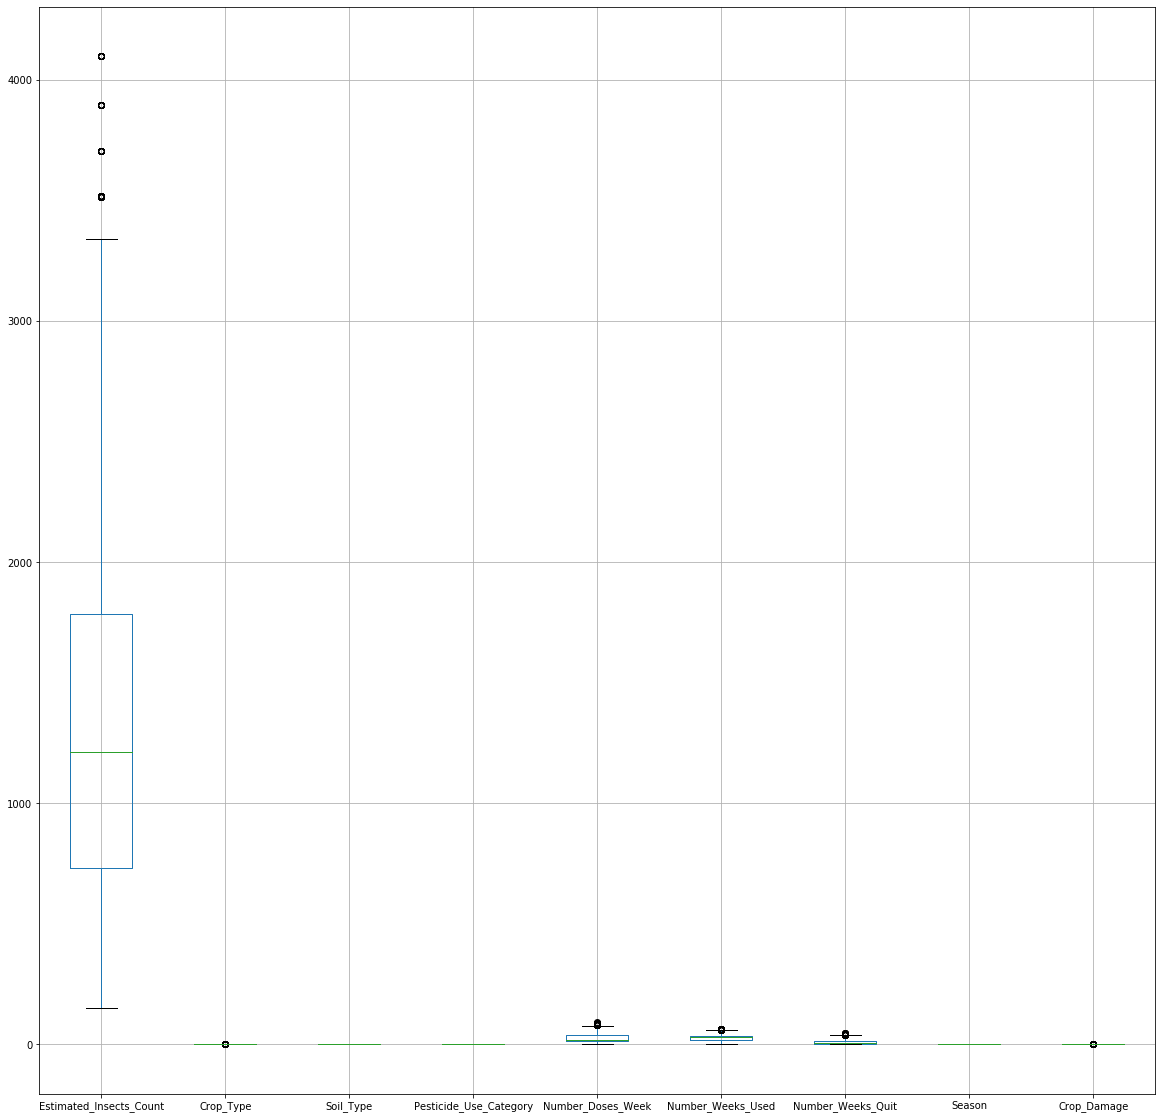

In [41]:
columnList=list(train_df.columns)

plt.figure(figsize=(20,20))
train_df.boxplot(column=columnList)

I am not going to remove any outlier. As they are present in Estimated insect counts and they are going to be useful.

## Model selection

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [43]:
Y=train_df['Crop_Damage']
X=train_df.drop('Crop_Damage',axis=1)

In [44]:
print(Y.shape)
print(X.shape)
print(X.columns)

(4599,)
(4599, 8)
Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')


In [45]:
# Normalization
cols2norm=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']

for col in cols2norm:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [46]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.009628,1,0,1,0.000000,0.000000,0.000000,1
1,0.014948,1,0,1,0.000000,0.000000,0.000000,2
2,0.027109,1,0,1,0.000000,0.000000,0.000000,2
3,0.027109,1,1,1,0.000000,0.000000,0.000000,2
4,0.048645,1,0,1,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...
4594,0.503674,0,1,2,0.210526,0.438187,0.021277,1
4595,0.503927,0,1,2,0.315789,0.712121,0.042553,1
4596,0.536357,0,1,2,0.105263,0.106061,0.574468,2
4597,0.536357,0,1,2,0.105263,0.303030,0.510638,2


In [47]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model

algo_list= [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(), RandomForestClassifier()]
for algo in algo_list:
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
        cm=algo
        cm.fit(x_train,y_train)
        pred=cm.predict(x_test)
        active_as=accuracy_score(pred,y_test)
        if active_as>max_accScore:
            max_accScore=active_as
            iBest_rs=iActive_rs
    print("Best(max) accuracy score of algo {} is {} for random state {}.".format(algo,max_accScore,iBest_rs))

Best(max) accuracy score of algo LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.8456521739130435 for random state 53.
Best(max) accuracy score of algo DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') is 0.8456521739130435 for random state 53.
Best(max) accuracy score of algo MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is 0.8521739130434782 for 

Support vector machine algorithm is giving us the best result with 86% accuracy at random state 68.
We will deploy SVM

In [48]:
svc=SVC(kernel='rbf', probability=True)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=68,test_size=0.2)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.8586956521739131
[[782 129]
 [  1   8]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       911
           1       0.06      0.89      0.11         9

    accuracy                           0.86       920
   macro avg       0.53      0.87      0.52       920
weighted avg       0.99      0.86      0.92       920



f1-score for class 0 is accurate, but for class 1 it's very low. Data provided to us is low on destroyed crops.

With more data in future we might be able to predict better.

In [49]:
from sklearn.model_selection import cross_val_score
# Calc cross validation scores to get better idea.
score=cross_val_score(svc,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Score is approximately 84% We are not under or overfitting the model.

std: 0.0
cross_val_score: 83.73463925708509


In [50]:
# ROC_curve
y_predProb=svc.predict_proba(x_test)[:,1]

In [51]:
fpr,tpr,threshold=roc_curve(y_test,y_predProb)

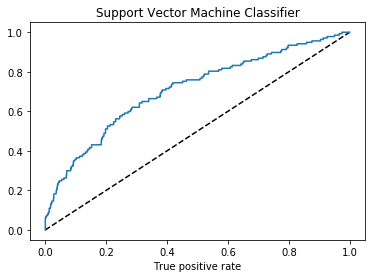

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="SVM Classifier")
plt.xlabel('False Positive rate')
plt.xlabel('True positive rate')
plt.title("Support Vector Machine Classifier")
plt.show()

In [53]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(svc,'SVM_Agriculture.pkl')

['SVM_Agriculture.pkl']